In [80]:
!pip install shap

In [81]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [82]:
import io

In [83]:
from google.colab import files
uploaded = files.upload()

Saving ERIE.csv to ERIE.csv


In [84]:
df= pd.read_csv(io.BytesIO(uploaded['ERIE.csv']))
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0      1/4/2010   39.150002   39.560001   39.150002   39.349998   25.904909   
1      1/5/2010   39.540001   39.540001   38.540001   38.770000   25.523081   
2      1/6/2010   38.669998   38.790001   38.410000   38.779999   25.529673   
3      1/7/2010   38.540001   38.959999   38.500000   38.930000   25.628424   
4      1/8/2010   38.799999   38.980000   38.529999   38.810001   25.549421   
...         ...         ...         ...         ...         ...         ...   
2635  6/23/2020  184.309998  187.639999  183.720001  186.110001  171.158691   
2636  6/24/2020  186.350006  186.350006  182.009995  183.410004  168.675598   
2637  6/25/2020  183.289993  188.869995  181.199997  188.169998  173.053253   
2638  6/26/2020  187.380005  188.880005  184.899994  186.059998  171.112732   
2639  6/29/2020  187.619995  190.580002  187.520004  188.500000  173.356689   

         Average  
0      36.622982  
1      36.382

In [85]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Adj Close,Average
0,39.150002,39.560001,39.150002,39.349998,25.904909,36.622982
1,39.540001,39.540001,38.540001,38.770000,25.523081,36.382617
2,38.669998,38.790001,38.410000,38.779999,25.529673,36.035934
3,38.540001,38.959999,38.500000,38.930000,25.628424,36.111685
4,38.799999,38.980000,38.529999,38.810001,25.549421,36.133884


In [86]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x = df.drop("Average", axis = 1)
y = df.Close
y = y.astype('int')

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [88]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
y_pred = clf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          38       1.00      1.00      1.00         4
          40       1.00      1.00      1.00         1
          41       1.00      0.33      0.50         3
          42       0.33      1.00      0.50         1
          43       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         5
          46       1.00      1.00      1.00         2
          53       1.00      1.00      1.00         1
          55       1.00      1.00      1.00         3
          56       1.00      1.00      1.00         1
          57       0.50      1.00      0.67         1
          58       1.00      0.50      0.67         2
          60       1.00      1.00      1.00         1
          61       0.00      0.00      0.00         1
          62       0.67      1.00      0.80         2
          63       1.00      1.00      1.00         7
          64       1.00      1.00      1.00         7
          65       1.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [90]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=0)

In [91]:
y_pred = classifier.predict(x_test)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.04040404040404041

In [93]:
clearer = shap.Explainer(clf)
shap_values = clearer.shap_values(x_test)

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


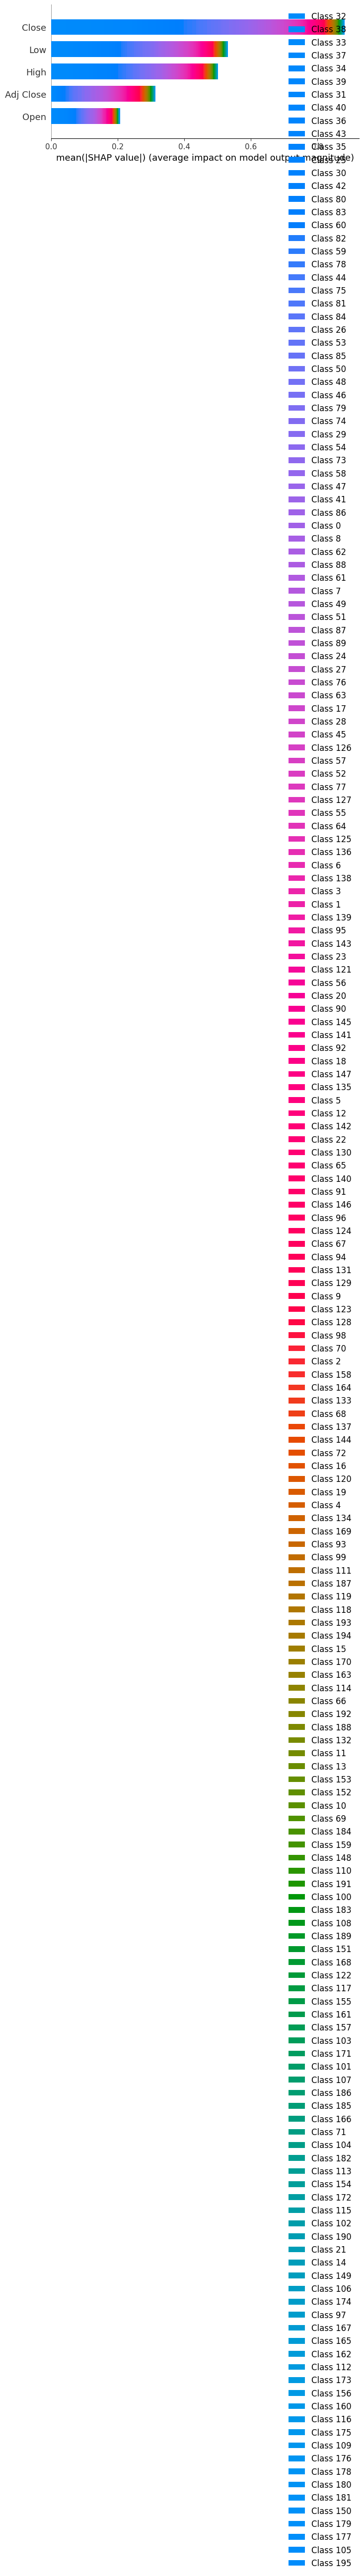

In [94]:
shap.summary_plot(shap_values, x_test)